##  PREDICTION OF GENRES USING MOVIE PLOTS

<br/>
<br/>

<center>
    
<table><tr><td><img src='Project_images/picture.png' width=500></td><td><img src='Project_images/project4.png' width=500></td></tr></table>
    
</center>

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prate\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
##importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time


from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [10]:
# 
#nRowsRead = 1000 # specify 'None' if want to read whole file
#movies = pd.read_csv('wiki_movie_plots_deduped.csv', delimiter=',', nrows = nRowsRead)
movies = pd.read_csv('wiki_movies.csv', delimiter=',')
movies.dataframeName = 'wiki_movies.csv'
nRow, nCol = movies.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 34886 rows and 8 columns


In [11]:
movies.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [12]:
# creation of the column count for aggregation
movies['Count']=1
movies[['Genre','Count']].groupby(['Genre'], as_index=False).count().shape[0]

2265


</br >
<center>
<img src="Project_images/project10.png" width=800 /> 
    
</center>
</br>

In [13]:

# %load Genre.py
movies['GenreCorrected'] =movies['Genre'] 
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' - ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' / ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('/', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' & ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(', ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('; ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-pic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biopic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographical', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biodrama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-drama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(film genre\)', '')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animated','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anime','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('children\'s','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedey','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[not in citation given\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' set 4,000 years ago in the canadian arctic','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historical','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romantic','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3-d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('viacom 18 motion pictures','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci-fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ttriller','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('.','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('based on radio serial','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' on the early years of hitler','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science fiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (30min)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('16 mm film','short')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[140\]','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[144\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' for ','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventures','adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung-fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial arts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war ii','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war i','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography about montreal canadiens star|maurice richard','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bholenath movies|cinekorn entertainment','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(volleyball\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy film','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anthology film','anthology')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography fim','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('avant-garde','avant_garde')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biker film','biker')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy cop','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy film','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy 2-reeler','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('films','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('film','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography of pioneering american photographer eadweard muybridge','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('british-german co-production','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bruceploitation','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy-drama adaptation of the mordecai richler novel','comedy-drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies by the mob\|knkspl','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movie','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming of age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming-of-age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama about child soldiers','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( based).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( co-produced).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( about).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musical b','musical')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationchildren','animation|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' period','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama loosely','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("yogesh dattatraya gosavi's directorial debut \[9\]",'')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("war-time","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wartime","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("ww1","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('unknown','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wwii","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psychological','psycho')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom-coms','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('true crime','crime')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|007','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('slice of life','slice_of_life')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computer animation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gun fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('j-horror','horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(shogi|chess\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('afghan war drama','war drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|6 separate stories','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(30min\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (road bicycle racing)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' v-cinema','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|docudrama','\|documentary|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' in animation','|animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptation).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptated).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( on ).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('american football','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dev\|nusrat jahan','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('television miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(artistic\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \|direct-to-dvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('history dram','history drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial art','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psycho thriller,','psycho thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|1 girl\|3 suitors','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(road bicycle racing\)','')
filterE = movies['GenreCorrected']=="ero"
movies.loc[filterE,'GenreCorrected']="adult"
filterE = movies['GenreCorrected']=="music"
movies.loc[filterE,'GenreCorrected']="musical"
filterE = movies['GenreCorrected']=="-"
movies.loc[filterE,'GenreCorrected']=''
filterE = movies['GenreCorrected']=="comedy–drama"
movies.loc[filterE,'GenreCorrected'] = "comedy|drama"
filterE = movies['GenreCorrected']=="comedy–horror"
movies.loc[filterE,'GenreCorrected'] = "comedy|horror"
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' ','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(',','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('-','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionadventure','action|adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actioncomedy','action|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actiondrama','action|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionlove','action|love')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionmasala','action|masala')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionchildren','action|children')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasychildren\|','fantasy|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasycomedy','fantasy|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasyperiod','fantasy|period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('cbctv_miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedysocial','drama|comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedydrama','comedy|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedyhorror','comedy|horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sciencefiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventurecomedy','adventure|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationdrama','animation|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('muslim','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('thriler','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('crimethriller','crime|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantay','fantasy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionthriller','action|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedysocial','comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martialarts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(children\|poker\|karuta\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('epichistory','epic|history')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotica','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotic','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((\|produced\|).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('chanbara','chambara')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedythriller','comedy|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('colour\|yellow\|productions\|eros\|international','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|directtodvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('liveaction','live|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('melodrama','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroes','superheroe')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gangsterthriller','gangster|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heistcomedy','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heist','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historic','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historydisaster','history|disaster')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('warcomedy','war|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('westerncomedy','western|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ancientcostume','costume')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computeranimation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramatic','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramaa','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('famil\|','family')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroe','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biogtaphy','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('devotionalbiography','devotional|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('docufiction','documentary|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familydrama','family|drama')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('espionage','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('supeheroes','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancefiction','romance|fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horrorthriller','horror|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspensethriller','suspense|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musicaliography','musical|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('triller','thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(fiction\)','|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanceaction','romance|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancecomedy','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancehorror','romance|horror')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romcom','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom\|com','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('satirical','satire')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fictionchildren','science_fiction|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('homosexual','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sexual','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('mockumentary','documentary')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('periodic','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanctic','romantic')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('politics','political')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('samurai','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv_miniseries','series')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('serial','series')

filterE = movies['GenreCorrected']=="musical–comedy"
movies.loc[filterE,'GenreCorrected'] = "musical|comedy"

filterE = movies['GenreCorrected']=="roman|porno"
movies.loc[filterE,'GenreCorrected'] = "adult"


filterE = movies['GenreCorrected']=="action—masala"
movies.loc[filterE,'GenreCorrected'] = "action|masala"


filterE = movies['GenreCorrected']=="horror–thriller"
movies.loc[filterE,'GenreCorrected'] = "horror|thriller"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('family','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial_arts','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horror','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('war','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventure','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fiction','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('noir','black')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superhero','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('social','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspense','action')


filterE = movies['GenreCorrected']=="drama|romance|adult|children"
movies.loc[filterE,'GenreCorrected'] = "drama|romance|adult"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|–\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip(to_strip='\|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionner','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()

In [14]:
moviesGenre = movies[['GenreCorrected','Count']].groupby(['GenreCorrected']).count()
moviesGenre.to_csv('GenreCorrected.csv',sep=',')

In [15]:
movies[['GenreCorrected','Count']].groupby(['GenreCorrected'], as_index=False).count().shape[0]

1199

</br >
<center>
<img src="Project_images/project5.png" width=500 /> 
    
</center>


#### after cleaning the data would look like - 

In [16]:
movies[['GenreCorrected','Count']].groupby(['GenreCorrected'],as_index=False).count().sort_values(['Count'], ascending=False).head(10)

,GenreCorrected,Count
0,,6206
516,drama,6107
359,comedy,4411
2,action,3790
1111,thriller,2163
964,romance,954
203,animation,601
973,romance|comedy,577
447,crime,573
387,comedy|drama,560


In [17]:
movies['GenreCorrected']

0                                 
1                                 
2                                 
3                                 
4                                 
5                                 
6                           action
7                           comedy
8                                 
9                                 
10                           short
11       short|action|crime|action
12                           short
13                       biography
14                          comedy
15                          comedy
16                           drama
17                           drama
18                          comedy
19                          action
20                           drama
21                          action
22                           drama
23                           drama
24                           drama
25                                
26                           drama
27                                
28                  

In [18]:

movies['GenreSplit']=movies['GenreCorrected'].str.split('|') #splitting genres  

movies['GenreSplit']=movies['GenreSplit'].apply(np.sort, axis=None).apply(np.unique) # looking for unique Genres in 
                                                                                        # GenreSplit
#movies['GenreSplit']

In [19]:
movies['GenreSplit'][11] 

array(['action', 'crime', 'short'], dtype='<U6')

#### Number of movies for each genres

In [20]:
genres_array = np.array([])

for i in range(0,movies.shape[0]-1):
    genres_array = np.concatenate((genres_array, movies['GenreSplit'][i] ))
    
genres_array

array(['', '', '', ..., 'comedy', 'comedy', 'romance'], dtype='<U32')

In [21]:
genres = pd.DataFrame({'Genre':genres_array})

In [22]:
genres.head(30)

,Genre
0,
1,
2,
3,
4,
5,
6,action
7,comedy
8,
9,


### Identification of the genres to be selected, their count and calculating their frequency

In [24]:
genres=genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False)

In [25]:
genres = genres[genres['Genre']!='']
genres.head(25)

,Genre,Count
116,drama,9487
85,comedy,7320
4,action,5952
426,thriller,3291
337,romance,2639
94,crime,1607
244,musical,951
16,animation,914
73,children,684
131,fantasy,542


In [26]:
TotalCountGenres=sum(genres['Count'])

In [27]:
TotalCountGenres

37321

#### The total count changed from 34885 to 37321 as we cleansed it!, Now let's calculate frequency for the genres!

In [28]:
# calcualting frequency of genres
genres['Frequency'] = genres['Count']/TotalCountGenres

In [29]:
#calculating cumulative frequency
genres['CumulativeFrequency'] = genres['Frequency'].cumsum()

In [30]:
genres.head(20)

,Genre,Count,Frequency,CumulativeFrequency
116,drama,9487,0.254200,0.254200
85,comedy,7320,0.196136,0.450336
4,action,5952,0.159481,0.609818
426,thriller,3291,0.088181,0.697998
337,romance,2639,0.070711,0.768709
94,crime,1607,0.043059,0.811768
244,musical,951,0.025482,0.837250
16,animation,914,0.024490,0.861740
73,children,684,0.018327,0.880068
131,fantasy,542,0.014523,0.894590


#### Picking up all the genres having frequency 95% and below

In [31]:
# Observing genres having cumulative frequency less than .957
np.array(genres[genres['CumulativeFrequency']<=.957]['Genre'])

array(['drama', 'comedy', 'action', 'thriller', 'romance', 'crime',
       'musical', 'animation', 'children', 'fantasy', 'mystery',
       'biography', 'black', 'history', 'short', 'documentary', 'sports',
       'series', 'adult', 'political'], dtype=object)

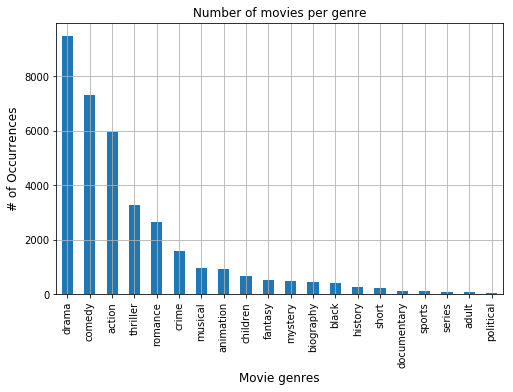

In [32]:
# Plotting genres and their respective count
genres[genres['CumulativeFrequency']<=.957][['Genre','Count']].plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of movies per genre")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Movie genres', fontsize=12)
plt.show()

In [33]:
mainGenres=np.array(genres[genres['CumulativeFrequency']<=.957]['Genre'])

In [34]:
arr1=np.array(['adult', 'romance', 'drama','and'])
arr1[np.in1d(arr1,mainGenres)] # genres not in the mainGenres array will be deleted

array(['adult', 'romance', 'drama'], dtype='<U7')

In [35]:
movies['GenreSplit'][10:12].apply(lambda x: x[np.in1d(x,mainGenres)])

10                   [short]
11    [action, crime, short]
Name: GenreSplit, dtype: object

In [36]:
movies['GenreSplitMain'] = movies['GenreSplit'].apply(lambda x: x[np.in1d(x,mainGenres)])

In [37]:
movies[['GenreSplitMain','GenreSplit','Genre']][180:200]

,GenreSplitMain,GenreSplit,Genre
190,[romance],[romance],romance
191,[comedy],[comedy],comedy
192,[drama],[drama],drama
193,[comedy],[comedy],comedy
194,[drama],[drama],drama
195,"[crime, drama]","[crime, drama]",crime drama
196,[comedy],[comedy],comedy
197,"[comedy, short]","[comedy, short]",comedy short
198,[fantasy],[fantasy],fantasy
199,[],[],unknown


### Cleaning the plot of the movies

###### Code below is for tokenizing,stemming and eradictaing stopwords and the rejoining the plot

<br/>
<br/>

<center>
    
<table><tr><td><img src='Project_images/projectmodel.png' width=500>
    
</center>

Pre-processing text data

Most of the text data are cleaned by following below steps.

    Remove punctuations
    Tokenization - Converting a sentence into list of words
    Remove stopwords
    Lammetization/stemming - Tranforming any form of a word to its root word
    



In [38]:
#Remove punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
# Function to remove punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

movies.Plot=movies.Plot.astype(str)
#Calling remove_punct function
movies['PlotClean'] = movies['Plot'].apply(lambda x: remove_punct(x)).astype(str) 

movies['PlotClean'].head(10)

0    A bartender is working at a saloon serving dri...
1    The moon painted with a smiling face hangs ove...
2    The film just over a minute long is composed o...
3    Lasting just  seconds and consisting of two sh...
4    The earliest known adaptation of the classic f...
5    Alice follows a large white rabbit down a Rabb...
6    The film opens with two bandits breaking into ...
7    The film is about a family who move to the sub...
8    The opening scene shows the interior of the ro...
9    Scenes are introduced using lines of the poem ...
Name: PlotClean, dtype: object

In [40]:
# creating function clean_text to remove apostrophies
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    #text = re.sub('\W', ' ', text)
    #text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [41]:
# Calling function clean_text
list(movies['PlotClean'][10:12].apply(clean_text))

['the rarebit fiend gorges on welsh rarebit at a restaurant when he leaves he begins to get dizzy as he starts to hallucinate he desperately tries to hang onto a lamppost as the world spins all around him a man helps him get home he falls into bed and begins having more hallucinatory dreams during a dream sequence the furniture begins moving around the room imps emerge from a floating welsh rarebit container and begin poking his head as he sleeps his bed then begins dancing and spinning wildly around the room before flying out the window with the fiend in it the bed floats across the city as the fiend floats up and off the bed he hangs off the back and eventually gets caught on a weathervane atop a steeple his bedclothes tear and he falls from the sky crashing through his bedroom ceiling the fiend awakens from the dream after falling out of his bed',
 'the film features a train traveling through the rockies and a hold up created by two thugs placing logs on the line they systematically

In [42]:
list(movies['PlotClean'][10:12])

['The Rarebit Fiend gorges on Welsh rarebit at a restaurant When he leaves he begins to get dizzy as he starts to hallucinate He desperately tries to hang onto a lamppost as the world spins all around him A man helps him get home He falls into bed and begins having more hallucinatory dreams During a dream sequence the furniture begins moving around the room Imps emerge from a floating Welsh rarebit container and begin poking his head as he sleeps His bed then begins dancing and spinning wildly around the room before flying out the window with the Fiend in it The bed floats across the city as the Fiend floats up and off the bed He hangs off the back and eventually gets caught on a weathervane atop a steeple His bedclothes tear and he falls from the sky crashing through his bedroom ceiling The Fiend awakens from the dream after falling out of his bed',
 'The film features a train traveling through the Rockies and a hold up created by two thugs placing logs on the line They systematically

In [43]:
movies.PlotClean=movies.PlotClean.astype(str)
movies['PlotClean_new'] = movies['PlotClean'].apply(clean_text)
movies['PlotClean_new'].head(5)

0    a bartender is working at a saloon serving dri...
1    the moon painted with a smiling face hangs ove...
2    the film just over a minute long is composed o...
3    lasting just  seconds and consisting of two sh...
4    the earliest known adaptation of the classic f...
Name: PlotClean_new, dtype: object

In [44]:
movies[['Plot','PlotClean','PlotClean_new','GenreSplitMain']][6:12]

,Plot,PlotClean,PlotClean_new,GenreSplitMain
6,The film opens with two bandits breaking into ...,The film opens with two bandits breaking into ...,the film opens with two bandits breaking into ...,[action]
7,The film is about a family who move to the sub...,The film is about a family who move to the sub...,the film is about a family who move to the sub...,[comedy]
8,The opening scene shows the interior of the ro...,The opening scene shows the interior of the ro...,the opening scene shows the interior of the ro...,[]
9,Scenes are introduced using lines of the poem....,Scenes are introduced using lines of the poem ...,scenes are introduced using lines of the poem ...,[]
10,The Rarebit Fiend gorges on Welsh rarebit at a...,The Rarebit Fiend gorges on Welsh rarebit at a...,the rarebit fiend gorges on welsh rarebit at a...,[short]
11,The film features a train traveling through th...,The film features a train traveling through th...,the film features a train traveling through th...,"[action, crime, short]"



</br >
<center>
<img src="Project_images/projecttokenizing.png" width=500 /> 
    
</center>

In [45]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemming = PorterStemmer() # using Porter Stemmer for stemming words
 


movies.PlotClean_new = movies.PlotClean_new.astype(str)    # coz pandas assign datatypes accordingly
movies.PlotClean_new = movies.PlotClean_new.apply(lambda x: x.lower())

# Function to identify tokens in Plot
def identify_tokens(row):
    movies = row['PlotClean_new']
    tokens = nltk.word_tokenize(movies)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words
# Calling function identify_tokens
movies['PlotClean_new'] = movies.apply(identify_tokens, axis=1)

In [46]:
print(movies['PlotClean_new'][0])

['a', 'bartender', 'is', 'working', 'at', 'a', 'saloon', 'serving', 'drinks', 'to', 'customers', 'after', 'he', 'fills', 'a', 'stereotypically', 'irish', 'mans', 'bucket', 'with', 'beer', 'carrie', 'nation', 'and', 'her', 'followers', 'burst', 'inside', 'they', 'assault', 'the', 'irish', 'man', 'pulling', 'his', 'hat', 'over', 'his', 'eyes', 'and', 'then', 'dumping', 'the', 'beer', 'over', 'his', 'head', 'the', 'group', 'then', 'begin', 'wrecking', 'the', 'bar', 'smashing', 'the', 'fixtures', 'mirrors', 'and', 'breaking', 'the', 'cash', 'register', 'the', 'bartender', 'then', 'sprays', 'seltzer', 'water', 'in', 'nations', 'face', 'before', 'a', 'group', 'of', 'policemen', 'appear', 'and', 'order', 'everybody', 'to', 'leave']


### Now moving ahead with removing STOPWORDS...
<br/>
<br/>

<center>
    
<table><tr><td><img src='Project_images/projectstopwords.png' width=500></td><td><img src='Project_images/projectstop.png' width=500></td></tr></table>
    
</center>

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
stopWords = set(stopwords.words('english'))
# Creating funtion remove_stops
def remove_stops(row):
    my_list = row['PlotClean_new']
    meaningful_words = [w for w in my_list if not w in stopWords]
    return (meaningful_words)
# Calling function remove_stops
movies['PlotClean_new'] = movies.apply(remove_stops, axis=1)

In [49]:
print(movies['PlotClean'][1])

The moon painted with a smiling face hangs over a park at night A young couple walking past a fence learn on a railing and look up The moon smiles They embrace and the moons smile gets bigger They then sit down on a bench by a tree The moons view is blocked causing him to frown In the last scene the man fans the woman with his hat because the moon has left the sky and is perched over her shoulder to see everything better



</br >
<center>
<img src="Project_images/projectstemming.png" width=500 /> 
    
</center>

In [50]:
# Creating function stem_list
def stem_list(row):
    my_list = row['PlotClean_new']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)
# Calling function stem_list
movies['PlotClean_new'] = movies.apply(stem_list, axis=1)

In [51]:
print(movies['PlotClean_new'][1])

['moon', 'paint', 'smile', 'face', 'hang', 'park', 'night', 'young', 'coupl', 'walk', 'past', 'fenc', 'learn', 'rail', 'look', 'moon', 'smile', 'embrac', 'moon', 'smile', 'get', 'bigger', 'sit', 'bench', 'tree', 'moon', 'view', 'block', 'caus', 'frown', 'last', 'scene', 'man', 'fan', 'woman', 'hat', 'moon', 'left', 'sky', 'perch', 'shoulder', 'see', 'everyth', 'better']


#### rejoining the data chunks once again below

In [52]:
#Function to rejoin meaningful words
def rejoin_words(row):
    my_list = row['PlotClean_new']
    joined_words = ( " ".join(my_list))
    return joined_words
# calling function rejoin_words
movies['PlotClean_new'] = movies.apply(rejoin_words, axis=1)

In [55]:
movies['MainGenresCount'] = movies['GenreSplitMain'].apply(len)

In [56]:
max(movies['MainGenresCount']) 

7

In [57]:
movies[movies['MainGenresCount']==7]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Count,GenreCorrected,GenreSplit,GenreSplitMain,PlotClean,PlotClean_new,MainGenresCount
17314,2017,American Made,American,Doug Liman,Doug Liman (director); Gary Spinelli (screenpl...,"biography, action, comedy, crime, drama, histo...",https://en.wikipedia.org/wiki/American_Made_(f...,"In the late 1970s, Barry Seal, a pilot for com...",1,biography|action|comedy|crime|drama|history|th...,"[action, biography, comedy, crime, drama, hist...","[action, biography, comedy, crime, drama, hist...",In the late s Barry Seal a pilot for commercia...,late barri seal pilot commerci airlin twa cont...,7


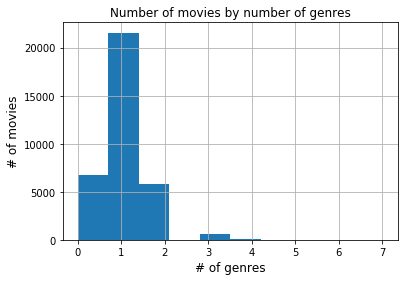

In [58]:
movies['MainGenresCount'].hist()

plt.title("Number of movies by number of genres")
plt.ylabel('# of movies', fontsize=12)
plt.xlabel('# of genres', fontsize=12)
plt.show()

## Training models

##### Why is it important to get your model trained correctly, so you can't see results like this -

<br/>
<br/>
<center>
<img src="Project_images/projectTitanic.jpeg" width=500 /> 
    
</center>



In [59]:

# the dummy classes
movies = pd.concat([movies, movies.GenreSplitMain.apply(lambda x: '-'.join(x)).str.get_dummies(sep='-')], axis=1)

In [60]:
# the train and the test data set will be build when there is at least one genre for a movie
MoviesTrain, MoviesTest = train_test_split(movies[movies.GenreCorrected!=''], random_state=42, test_size=0.30, shuffle=True)

In [61]:
##Features
# definition the algorithm for feature extraction
tfidf = TfidfVectorizer(stop_words ='english', smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

In [65]:

# building the features
x_train = tfidf.fit_transform(MoviesTrain.PlotClean_new) 
x_test  = tfidf.transform(MoviesTest.PlotClean_new)
### for test data, the feature extraction will be done through the function transform()
### to make sure there is no features dimensionality mismatch

In [66]:
type(x_train)

scipy.sparse.csr.csr_matrix

In [67]:
type(x_test)

scipy.sparse.csr.csr_matrix

In [68]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
tfidf.inverse_transform(x_train[0].toarray())

[array(['abil', 'abl', 'accept', 'acquaint', 'activ', 'advers', 'affect',
        'aggress', 'agre', 'aid', 'allow', 'amidst', 'apart', 'arena',
        'armi', 'arous', 'arriv', 'art', 'artist', 'attempt', 'away',
        'bag', 'bandit', 'bare', 'barrag', 'battl', 'beat', 'beaten',
        'blow', 'bruce', 'brutal', 'challeng', 'chanc', 'chao', 'cheer',
        'child', 'chines', 'chingchuen', 'chow', 'chun', 'claim',
        'closeddoor', 'coal', 'colleagu', 'collect', 'colonel', 'come',
        'compet', 'competit', 'consent', 'conserv', 'contain', 'cotton',
        'crowd', 'day', 'declin', 'decrepit', 'defeat', 'defend', 'defens',
        'demand', 'desper', 'despit', 'direct', 'discipl', 'discuss',
        'display', 'earlier', 'earn', 'effect', 'embarrass', 'energi',
        'enhanc', 'enrag', 'epilogu', 'equal', 'escap', 'establish',
        'eventu', 'everi', 'everyon', 'exhibit', 'extort', 'famili',
        'feel', 'fellow', 'fight', 'fighter', 'figur', 'final', 'flee',
    

In [70]:
x_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
tfidf.inverse_transform(x_test[0].toarray())

[array(['alabama', 'artifact', 'automobil', 'bacon', 'bedford', 'caldwel',
        'camilla', 'children', 'clash', 'cultur', 'decapit', 'describ',
        'display', 'donna', 'duval', 'exwif', 'famili', 'father', 'film',
        'funer', 'gawk', 'grisli', 'hometown', 'hurt', 'ii', 'includ',
        'interview', 'involv', 'jayn', 'jim', 'kingsley', 'lanasa',
        'london', 'mansfield', 'morrison', 'mother', 'movi', 'nearbi',
        'oconnor', 'patriarch', 'phillip', 'play', 'refer', 'reveal',
        'seat', 'set', 'sister', 'star', 'stevenson', 'supposedli',
        'tennesse', 'thornton', 'titl', 'town', 'vehicl', 'veteran', 'war',
        'wife', 'william', 'world'], dtype='<U61')]

In [72]:
print('The corpus is huge. It contain {} words.'.format(len(x_train[0].toarray()[0])))

The corpus is huge. It contain 89935 words.


In [73]:
# building the classes
y_train = MoviesTrain[MoviesTrain.columns[14:]]
y_test = MoviesTest[MoviesTest.columns[14:]]

In [76]:

len(y_test.columns),len(y_train.columns)

(21, 21)

## Multinomial Naive Bayes Classifier
<br/>
<br/>

<center>
    
<table><tr><td><img src='Project_images/projectnaivebayes2.png' width=500></td><td><img src='Project_images/projectnaiveuncle.png' width=300></td></tr></table>
    
</center>

In [77]:
multinomialNB=OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))

In [78]:
# fitting the model
multinomialNB.fit(x_train, y_train.action)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=None)

In [79]:
# compute the testing accuracy
prediction = multinomialNB.predict(x_test)

In [80]:
print('Test accuracy is {}'.format(accuracy_score(y_test.action, prediction)))

Test accuracy is 0.8215946071594608


In [81]:
len(mainGenres)

20

#### multinomial Naive Bayes Classification for all the movie genres

In [82]:
accuracy_multinomialNB=pd.DataFrame(columns=['Genre', 'accuracy_multinomialNB'])
accuracy_multinomialNB.head()

,Genre,accuracy_multinomialNB


In [83]:
i = 0
for genre in mainGenres:
    multinomialNB.fit(x_train, y_train[genre])
    prediction = multinomialNB.predict(x_test)
    accuracy_multinomialNB.loc[i,'Genre'] = genre
    accuracy_multinomialNB.loc[i,'accuracy_multinomialNB'] = accuracy_score(y_test[genre], prediction)
    i=i+1
    

    
accuracy_multinomialNB

,Genre,accuracy_multinomialNB
0,drama,0.668178
1,comedy,0.721409
2,action,0.821595
3,thriller,0.875872
4,romance,0.841818
5,crime,0.908066
6,musical,0.934333
7,animation,0.972222
8,children,0.953394
9,fantasy,0.971176


### Now let's try the same model with Random Forest Classifier
<br/>
<br/>

<center>
    
<img src='Project_images/projectrandomforest4.png' width=600>
    
</center>

In [113]:

# building the features
x_train1 = tfidf.fit_transform(MoviesTrain.PlotClean_new.sample(2000))

x_test1  = tfidf.transform(MoviesTest.PlotClean_new)
### for test data, the feature extraction will be done through the function transform()
### to make sure there is no features dimensionalitxy mismatch

In [114]:
x_train1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
tfidf.inverse_transform(x_train1[0].toarray())

[array(['action', 'advoc', 'air', 'american', 'antiwar', 'atroc', 'attend',
        'await', 'becom', 'beull', 'camp', 'children', 'civilian',
        'commit', 'committe', 'condit', 'confer', 'confirm', 'dc', 'death',
        'depict', 'develop', 'dornbeck', 'eagerli', 'eldest', 'film',
        'florida', 'forc', 'friendship', 'garrett', 'home', 'horrifi',
        'hostil', 'howev', 'husband', 'increas', 'inde', 'kay', 'kill',
        'lawton', 'lieuten', 'mari', 'marri', 'miss', 'pari', 'peac',
        'phil', 'prisonerofwar', 'proof', 'provid', 'receiv', 'releas',
        'report', 'return', 'sandi', 'school', 'serv', 'sharon', 'shock',
        'shown', 'soldier', 'teacher', 'telegram', 'testifi', 'togeth',
        'travel', 'treat', 'ultim', 'vietnam', 'vietnames', 'washington',
        'weaken', 'wed', 'week', 'went', 'women'], dtype='<U29')]

In [116]:
x_test1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
tfidf.inverse_transform(x_test1[0].toarray())

[array(['alabama', 'artifact', 'automobil', 'bacon', 'bedford', 'caldwel',
        'camilla', 'children', 'clash', 'cultur', 'decapit', 'describ',
        'display', 'donna', 'duval', 'exwif', 'famili', 'father', 'film',
        'funer', 'grisli', 'hometown', 'hurt', 'ii', 'includ', 'interview',
        'involv', 'jayn', 'jim', 'kingsley', 'london', 'mansfield',
        'morrison', 'mother', 'movi', 'nearbi', 'oconnor', 'patriarch',
        'phillip', 'play', 'refer', 'reveal', 'seat', 'set', 'sister',
        'star', 'stevenson', 'supposedli', 'tennesse', 'thornton', 'titl',
        'town', 'vehicl', 'veteran', 'war', 'wife', 'william', 'world'],
       dtype='<U29')]

In [118]:
print('The corpus is huge. It contain {} words.'.format(len(x_train1[0].toarray()[0])))

The corpus is huge. It contain 26493 words.


In [119]:
# building the classes
y_train = MoviesTrain[MoviesTrain.columns[14:]].sample(2000)
y_test = MoviesTest[MoviesTest.columns[14:]]

In [120]:
print('Training Features Shape:', x_train1.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test1.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2000, 26493)
Training Labels Shape: (2000, 21)
Testing Features Shape: (8604, 26493)
Testing Labels Shape: (8604, 21)


In [121]:
### Random Forest 
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(x_train1, y_train);


In [122]:
# Make predictions on Test Data
# Use the forest's predict method on the test data
predictions = rf.predict(x_test1)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: MainGenresCount    0.38
action             0.33
adult              0.00
animation          0.05
biography          0.02
black              0.02
children           0.04
comedy             0.38
crime              0.10
documentary        0.01
drama              0.46
fantasy            0.03
history            0.02
musical            0.05
mystery            0.03
political          0.00
romance            0.14
series             0.00
short              0.01
sports             0.01
thriller           0.19
dtype: float64 degrees.


In [123]:
# Determine performance metrics
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: MainGenresCount    61.53
action             66.70
adult              99.68
animation          94.79
biography          97.66
black              97.64
children           95.97
comedy             62.14
crime              90.09
documentary        99.40
drama              53.76
fantasy            97.06
history            98.38
musical            94.59
mystery            97.25
political          99.60
romance            85.91
series             99.63
short              98.77
sports             99.17
thriller           80.98
dtype: float64 %.


**MultiNomial Naive Bayes Accuracy** | **Random Forest Accuracy** |
-------------------------------------|----------------------------|
               82.5%                 |           62%              |

# CONCLUSION

We predicted Movie Genres on basis of plot using two Classification Algorithms namely MultiNomial Naive Bayes Classifier and 
Random Forest Regressor.
We found that the accuracy of MultiNomial Naive Bayes Classifier is 82.5% while accuracy of Random Forest Regressor is 62%.
Hence seeing the fact we can conclude that Multinomial classifier is more suitable for our dataset.


<br/>
<br/>

<center>

<img src='Project_images/projectanyquestions.png' width=500>    
    
</center>

##### References :
https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis

https://www.kaggle.com/ashishpatel26/beginner-to-intermediate-nlp-tutorial

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/